<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.4/506.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.66
    Uninstalling yfinance-0.2.66:
      Successfully uninstalled yfinance-0.2.66
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a64fbcfc52836eda60dae35b369716077bcd3158f288c6af2ccb230d1d2363c9
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-10-17 17:04:57
-------------------
qualified stocks: 86
with latest results: 27
still star stocks: 16
-------------------
Initial Investment:  1.23 C
CY Investment:  1.50 C
Reserve:  1.09 L
Current:  1.40 C
-------------------
Today PnL: -15.96 K (-0.11%)
Current PnL: -21.24 L (-14.15%)
CY Booked + Current PnL: -9.34 L (-6.22%)
-------------------
Total profit:  1.81 L
Total loss:  -23.05 L
-------------------
Total Booked + Current PnL: 17.64 L (14.33%)
Total Booked PnL: 38.88 L (31.58%)
Curr Year Booked PnL: 11.90 L (8.49%)
Prev Year Booked PnL: 26.98 L (21.91%)
Est FTT:  2.28 C
Est FTT PnL: 88.05 L (62.78%)
Deployed:  1.23 C
Current:  1.40 C
CAGR/XIRR %: 7.73%
Row successfully appended and saved to data/myPortfolioDB.csv.


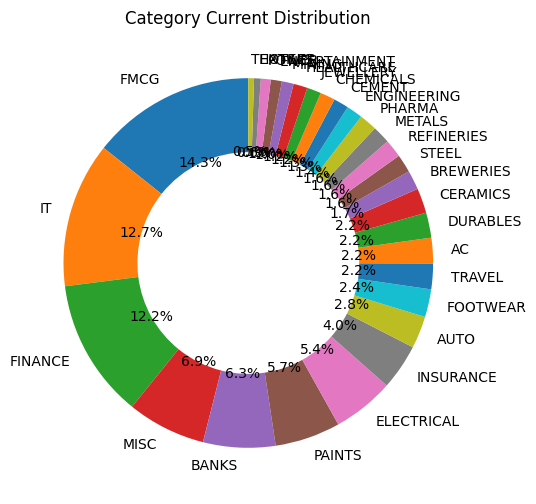

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
18,CIPLA,1492.70,1662.74,-19.01,3.89,X-LC,61.0,216131.0,11631.0,11671.0,...,5.69,5.40,11.39,10.0,1.00,1.55,15.15,X40N,PHARMA,ATH
83,VOLTAS,1278.28,1530.00,2.00,1.34,X-MC,60.0,213990.0,22248.0,15514.0,...,11.60,7.25,19.69,99.0,1.43,1.54,19.19,XY25,AC,NTT
76,TTKPRESTIG,769.29,770.00,95.30,1.69,M-SC,47.0,84128.0,-16649.0,16741.0,...,-16.52,19.90,0.09,245.0,-0.99,0.60,10.53,OX40N,DURABLES,NTT
56,RELIANCE,1348.50,1533.00,-11.69,2.85,X-LC,63.0,221021.0,10655.0,18124.0,...,5.06,8.20,13.68,37.0,0.59,1.59,22.42,XY25,REFINERIES,NTT
33,ICICIGI,1839.64,2260.25,-13.60,2.32,X-MC,64.0,148074.0,11941.0,19190.0,...,8.77,12.96,22.86,91.0,0.62,1.06,22.49,X40,INSURANCE,ATH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,AWL,315.97,485.00,-64.66,1.98,X-SC,47.0,249732.0,-52019.0,213446.0,...,-17.24,85.47,53.50,116.0,-0.24,1.79,10.92,XY24,FMCG,NTT
72,TATAMOTORS,761.77,1065.00,-54.37,7.45,X-LC,14.0,143966.0,-132557.0,242626.0,...,-47.94,168.53,39.81,54.0,-0.55,1.03,1.47,XY24,AUTO,NTT
57,REPCOHOME,463.60,880.00,-57.53,2.48,H-SC,62.0,243646.0,-42859.0,300196.0,...,-14.96,123.21,89.82,134.0,-0.14,1.75,28.91,XY24,FINANCE,NTT
10,BANDHANBNK,207.88,400.00,-13.52,2.86,H-SC,45.0,215713.0,-62846.0,320291.0,...,-22.56,148.48,92.42,151.0,-0.20,1.55,24.67,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-40.23,7.08,H-LC,50.0,249696.0,-11923.0,131140.0,...,-4.56,52.52,45.57,7.0,-0.09,1.79,6.25,AR,ELECTRICAL,NTT
2,ACC,2379.51,3906.00,-38.50,3.27,X-MC,44.0,183270.0,-54681.0,207333.0,...,-22.98,113.13,64.15,174.0,-0.26,1.32,2.80,XY24,CEMENT,BTT
4,ANGELONE,2329.34,3033.00,15.76,8.84,X-SC,69.0,204713.0,13707.0,43993.0,...,7.18,21.49,30.21,157.0,0.31,1.47,29.56,X40N,FINANCE,NTT
5,ASIANPAINT,2861.00,3465.66,-12.45,5.30,X-LC,65.0,220686.0,-31082.0,84302.0,...,-12.35,38.20,21.13,27.0,-0.37,1.59,18.71,X40,PAINTS,ATH
8,AWL,315.97,485.00,-64.66,1.98,X-SC,47.0,249732.0,-52019.0,213446.0,...,-17.24,85.47,53.50,116.0,-0.24,1.79,10.92,XY24,FMCG,NTT
9,BAJAJHFL,122.26,181.50,-14.87,6.04,X-MC,42.0,179465.0,-21041.0,118196.0,...,-10.49,65.86,48.45,90.0,-0.18,1.29,3.49,X40N,FINANCE,ATH
11,BANKINDIA,116.91,190.00,-26.62,12.16,H-MC,53.0,189343.0,9535.0,102870.0,...,5.30,54.33,62.52,88.0,0.09,1.36,41.20,XR,BANKS,NTT
12,BATAINDIA,1550.24,2096.00,1.45,4.31,X-SC,42.0,95475.0,-33195.0,78490.0,...,-25.80,82.21,35.20,219.0,-0.42,0.69,9.58,X40,FOOTWEAR,NTT
13,BERGEPAINT,561.33,680.00,-17.65,1.78,X-MC,57.0,220684.0,-6655.0,54708.0,...,-2.93,24.79,21.14,106.0,-0.12,1.59,24.39,XY24,PAINTS,NTT
16,CAMS,3643.00,5211.76,-6.41,0.86,X-SC,45.0,106280.0,4276.0,39653.0,...,4.19,37.31,43.06,122.0,0.11,0.76,22.03,X40N,MISC,ATH


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,92.31,10.27,H-SC,21.0,130125.0,-88371.0,116566.0,...,-40.45,89.58,12.90,153.0,-0.76,0.94,0.00,OX40N,FINANCE,NTT
17,CERA,7647.97,9475.0,-24.34,2.36,H-SC,38.0,138046.0,-37857.0,79873.0,...,-21.52,57.86,23.89,149.0,-0.47,0.99,19.22,OX40N,CERAMICS,NTT
37,INDIGOPNTS,1407.73,1408.0,94.75,3.98,M-SC,32.0,127546.0,-47013.0,47052.0,...,-26.93,36.89,0.02,221.0,-1.00,0.92,10.94,OX40N,PAINTS,NTT
42,JCHAC,2282.24,2282.0,19617.39,1.61,M-SC,42.0,96365.0,-31440.0,31425.0,...,-24.60,32.61,-0.01,232.0,-1.00,0.69,9.12,OX40N,AC,NTT
44,KANSAINER,299.63,340.0,-66.81,1.90,H-SC,61.0,227934.0,-41733.0,78067.0,...,-15.48,34.25,13.47,138.0,-0.53,1.64,15.90,XY24,PAINTS,NTT
52,RAJESHEXPO,517.65,518.0,1627.27,2.92,L-SC,39.0,47133.0,-90044.0,90137.0,...,-65.64,191.24,0.07,267.0,-1.00,0.34,17.22,OX40N,JEWELLERY,NTT
62,SFL,1016.35,1287.0,30.42,7.79,M-SC,43.0,172202.0,-90016.0,159838.0,...,-34.33,92.82,26.63,229.0,-0.56,1.24,7.07,XY24,MISC,NTT
65,SIS,435.42,528.0,2023.83,3.97,H-SC,45.0,85706.0,-25326.0,48938.0,...,-22.81,57.10,21.26,156.0,-0.52,0.62,15.80,OX40N,MISC,NTT
69,SYMPHONY,1306.42,1306.0,-44.75,18.81,M-SC,42.0,117618.0,-53523.0,53469.0,...,-31.27,45.46,-0.03,196.0,-1.00,0.85,2.54,OX40N,DURABLES,NTT
71,TATAELXSI,6938.68,9161.0,-24.55,7.34,H-MC,44.0,102020.0,-29815.0,72036.0,...,-22.62,70.61,32.03,98.0,-0.41,0.73,14.27,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ACC,2379.51,3906.00,-38.50,3.27,X-MC,44.0,183270.0,-54681.0,207333.0,...,-22.98,113.13,64.15,174.0,-0.26,1.32,2.80,XY24,CEMENT,BTT
7,ATULAUTO,579.80,844.00,3624.32,3.74,M-SC,49.0,167144.0,-29988.0,119809.0,...,-15.21,71.68,45.57,236.0,-0.25,1.20,18.50,XY24,AUTO,NTT
8,AWL,315.97,485.00,-64.66,1.98,X-SC,47.0,249732.0,-52019.0,213446.0,...,-17.24,85.47,53.50,116.0,-0.24,1.79,10.92,XY24,FMCG,NTT
10,BANDHANBNK,207.88,400.00,-13.52,2.86,H-SC,45.0,215713.0,-62846.0,320291.0,...,-22.56,148.48,92.42,151.0,-0.20,1.55,24.67,XY24,BANKS,NTT
13,BERGEPAINT,561.33,680.00,-17.65,1.78,X-MC,57.0,220684.0,-6655.0,54708.0,...,-2.93,24.79,21.14,106.0,-0.12,1.59,24.39,XY24,PAINTS,NTT
15,CAMPUS,294.86,393.00,-22.86,2.83,M-SC,58.0,160600.0,-7175.0,63019.0,...,-4.28,39.24,33.28,210.0,-0.11,1.15,24.48,XY24,FOOTWEAR,NTT
19,COALINDIA,406.65,497.97,7.30,2.75,L-LC,55.0,143856.0,-6604.0,40395.0,...,-4.39,28.08,22.46,167.0,-0.16,1.03,12.90,XY25,MINING,ATH
21,COLPAL,2633.65,3767.14,-1.58,7.87,X-MC,55.0,229530.0,-33835.0,147175.0,...,-12.85,64.12,43.04,84.0,-0.23,1.65,6.56,XY25,FMCG,ATH
22,DABUR,511.48,735.00,-8.81,3.34,X-MC,53.0,246550.0,-1518.0,109937.0,...,-0.61,44.59,43.70,102.0,-0.01,1.77,13.75,XY24,FMCG,BTT
24,EASEMYTRIP,18.12,26.40,-19.28,25.93,M-SC,39.0,77771.0,-99044.0,179838.0,...,-56.02,231.24,45.70,197.0,-0.55,0.56,1.53,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-40.23,7.08,H-LC,50.0,249696.0,-11923.0,131140.0,...,-4.56,52.52,45.57,7.0,-0.09,1.79,6.25,AR,ELECTRICAL,NTT
3,ALKYLAMINE,2347.98,4546.37,-12.24,6.06,H-SC,46.0,82728.0,-18235.0,112767.0,...,-18.06,136.31,93.63,148.0,-0.16,0.59,23.22,SR,CHEMICALS,ATH
6,ASIANTILES,75.41,137.00,6794.44,6.26,L-SC,59.0,75623.0,-18187.0,94809.0,...,-19.39,125.37,81.67,269.0,-0.19,0.54,46.45,XR,CERAMICS,NTT
11,BANKINDIA,116.91,190.00,-26.62,12.16,H-MC,53.0,189343.0,9535.0,102870.0,...,5.30,54.33,62.52,88.0,0.09,1.36,41.20,XR,BANKS,NTT
14,BSOFT,551.58,836.99,-22.54,15.10,H-SC,33.0,86955.0,-53698.0,126476.0,...,-38.18,145.45,51.74,131.0,-0.42,0.62,0.00,XR,IT,ATH
20,COFFEEDAY,59.14,80.00,-45.67,29.16,L-SC,49.0,81350.0,-32199.0,72247.0,...,-28.36,88.81,35.27,268.0,-0.45,0.58,99.11,XR,HOTELS,NTT
23,DEN,52.79,75.00,89.12,4.98,M-SC,38.0,53008.0,-31456.0,66992.0,...,-37.24,126.38,42.07,237.0,-0.47,0.38,12.57,AR,ENTERTAINMENT,NTT
26,HAPPSTMNDS,801.03,1488.71,-26.54,15.55,H-SC,29.0,79184.0,-48981.0,159009.0,...,-38.22,200.81,85.85,132.0,-0.31,0.57,1.08,AR,IT,ATH
27,HATHWAY,18.12,31.40,842.03,5.70,H-SC,33.0,81120.0,-27600.0,107281.0,...,-25.39,132.25,73.29,161.0,-0.26,0.58,8.51,XR,ENTERTAINMENT,NTT
35,IEX,147.35,219.00,-36.17,17.11,H-SC,32.0,182082.0,-17872.0,115094.0,...,-8.94,63.21,48.63,115.0,-0.16,1.31,1.58,XR,MISC,NTT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.64
1,20,36.36
2,30,51.77


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,46.14
LC,32.15
MC,21.70


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,30.58
X40,14.80
XY25,12.41
XR,10.91
X40N,10.24
AR,8.06
OX40N,7.63
X200,1.81
X5K,1.56


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,25.41
X-LC,21.17
X-MC,16.02
M-SC,12.82
X-SC,6.45
M-LC,5.23
H-LC,4.72
H-MC,3.78
M-MC,1.59


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

,,CurrAlloc%
Criteria,Conviction,
XY24,H-SC,9.93
X40,X-LC,8.93
XY24,M-SC,6.47
XR,H-SC,5.80
XY25,X-LC,5.63
X40,X-MC,5.18
XY24,X-MC,4.68
AR,H-SC,4.19
X40N,X-LC,3.67


In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,14.30,-3.12,37.11
IT,12.70,-18.86,83.01
FINANCE,12.16,-11.72,62.36
MISC,6.88,-20.04,86.54
BANKS,6.33,-13.54,73.27
PAINTS,5.74,-15.87,33.15
ELECTRICAL,5.36,-10.17,48.83
INSURANCE,4.00,0.69,36.44
AUTO,2.81,-46.64,107.84


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,72.75,10124101.0,-10.33,-1046281.0,53.69,5435926.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,56.29,7835449.0,-6.39,-500803.0,43.86,3436590.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3319222.0
XR,1391380.0
AR,1171478.0
X40,777991.0
X40N,601006.0
OX40N,586689.0
XY25,455907.0
SR,264770.0
X5K,100035.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3464825.0
M-SC,1224419.0
X-LC,1009636.0
X-MC,916927.0
X-SC,745089.0
H-MC,354105.0
H-LC,281800.0
M-LC,280080.0
L-SC,257193.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1190415.0
AR        H-SC           835555.0
XR        H-SC           834596.0
XY24      M-SC           689132.0
X40       X-LC           484049.0
XY24      X-SC           378114.0
          X-MC           371978.0
          X-LC           309445.0
X40N      X-SC           288485.0
OX40N     H-SC           275829.0
SR        H-SC           264770.0
X40       X-MC           215452.0
AR        H-LC           208655.0
XY24      H-MC           179199.0
          M-MC           171021.0
XR        L-SC           167056.0
X40N      X-MC           166808.0
XY25      X-MC           162689.0
OX40N     M-SC           148687.0
X40N      X-LC           145713.0
XY25      M-SC           143315.0
AR        M-SC           127268.0
XR        M-SC           116017.0
          M-LC           111048.0
          H-MC           102870.0
X5K       M-LC           100035.0
OX40N     L-SC            90137.0
X40       X-SC            78490.0
X200      H-LC            73145.0
OX40N     H-MC            72036.0
XY25      X-LC            70429.0
MH        H-SC            63660.0
XR        L-MC            59793.0
XY25      L-LC            40395.0
          M-LC            39079.0
XY24      M-LC            29918.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,25
M-SC,15
X-LC,12
X-MC,11
X-SC,7
M-LC,4
H-LC,3
L-SC,3
H-MC,3
